
# Clustering the neighborhoods in the city of Almadinah using K-means 

# 1- Introduction

Almadinah city in Saudi Arabia has the second holey mosque for Muslims around the world. Because of that it is visited during a whole year.  Therefore, it is good for visitors to know the neighborhoods of the city and its characteristics. This will lead them to book their hotels and stay during their visits in their favorite neighborhoods.  As a result, in this project I am aiming to cluster the neighborhoods in the city of Almadinah  using  k-means clustering technique. 

# 2- Objective

The main goal of this project is to cluster the neighborhoods in the city of Almadinah in Saudi Arabia. For achieving that the neighborhoods of Almadinah city will be studied and analyzed first. Then, K-means is implemented. This will assist visitors of the city to know where to stay in the city during their visit. 

# 3- Target Audience

The results of this project would be helpful for people who are interested in visiting Almadinah city and knowing its neighborhoods. 

# 4- Data Description

### 4.1- Location Data of Saudi Arabia

This project on github (https://github.com/homaily/Saudi-Arabia-Regions-Cities-and-Districts/tree/master/json) has information about Regions, Cities and Districts in Saudi Arabia. The data is public and collected from https://maps.address.gov.sa/ as ,all coordinates in (Lat, Lon) aka (Y, X) format and 8 decimal points. Data points include: Regions, Cities and Districts. All names are written in tow languages: Arabic and English. This data is divided into three parts:
 - regions.json
 - cities.json
 - districts.json
 
However, the first step is to covert  this data into a pandas data frame for further analysis.


### 4.2- Coordinate data for Saudi Cities

All the venues in each neighborhood in the KSA cities will be collected from Fousquare using Fousquare API.  Because we are interested in neighborhoods of Almadinah city, therefore, its  venues will be considered. 

### 4.3- Sample from data and features

In [101]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np # library to handle data in a vectorized manner


import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

import json # library to handle JSON files

Libraries imported.


#### Loading regions.json for extract KSA regions and explore it

In [ ]:
with open('/Users/malruily/week5/regions.json', encoding="utf-8") as json_data:    
    country_data = json.load(json_data)
print('No of regon:',len(country_data) )
country_data

#### Then convert json object of KSA regions to Pandas dataframe

In [104]:
# - Then convert json object of KSA districts to Pandas dataframe


country_regions= pd.DataFrame(columns= [ 'region_id', 'name_ar', 'name_en','population' , 'capital_city_id','Latitude', 'Longitude'] )

for i,data in enumerate (country_data):
    row=[]
    for c in country_regions.columns:
        if c == 'Latitude' :
            row.append(data['center'][0])    
        elif c== 'Longitude':  
            row.append(data['center'][1]) 
        else:
            row.append(data[c])    
    country_regions.loc[len(country_regions)] = row
    
country_regions.head()


,region_id,name_ar,name_en,population,capital_city_id,Latitude,Longitude
0,1,منطقة الرياض,Riyadh,6777146,3,24.70000,46.73333
1,2,منطقة مكة المكرمة,Makkah,6915006,6,21.42718,39.84349
2,3,منطقة المدينة المنورة,Madinah,1777933,14,24.47058,39.60781
3,4,منطقة القصيم,Qassim,1215858,11,26.33034,43.97436
4,5,المنطقة الشرقية,Eastern Province,4105780,13,26.44199,50.10920


#### Loading cities.json for extract KSA cities and explore it

In [105]:
with open('/Users/malruily/week5/cities.json', encoding="utf-8") as json_data:    
    cities_data = json.load(json_data)

#### Then convert json object of KSA cities to Pandas dataframe

In [106]:
# - Then convert json object of KSA cities to Pandas dataframe


country_cities= pd.DataFrame(columns= ['city_id', 'region_id', 'name_ar', 'name_en','Latitude', 'Longitude'] )


for data in cities_data:
    row=[]
    for c in country_cities.columns:
        if c == 'Latitude' :
            row.append(data['center'][0])    
  
        elif c== 'Longitude':
  
            row.append(data['center'][1]) 
        else:
            row.append(data[c])    
    #print(row)
    country_cities.loc[len(country_cities)] = row
    
country_cities.head()

,city_id,region_id,name_ar,name_en,Latitude,Longitude
0,1,7,تبوك,Tabuk,28.41464,36.53387
1,2,7,نعمي,Na'mi,28.30508,35.74931
2,3,1,الرياض,Riyadh,24.70000,46.73333
3,4,7,حميط,Humayt,28.65152,35.38013
4,5,2,الطائف,At Taif,21.26848,40.41667


#### Loading cities.json for extract KSA districts and explore it

In [107]:
#with open('newyork_data.json') as json_data:
with open('/Users/malruily/week5/districts.json', encoding="utf-8") as json_data:    
    districts_data = json.load(json_data)

#### Then convert json object of KSA districts to Pandas dataframe

In [108]:

# - Then convert json object of KSA districts to Pandas dataframe

country_districts= pd.DataFrame(columns= ['district_id','city_id', 'region_id', 'name_ar', 'name_en','Latitude', 'Longitude', 'boundaries'] )

for data in districts_data:
    row=[]
    for c in country_districts.columns:
        if c == 'Latitude' :
            boundaries = np.array(data['boundaries'][0])
            center=boundaries.mean(axis=0 )
            #center=np.median(boundaries,axis=0 )
            row.append(center[0])   
            row.append(center[1])   

        elif c == 'Longitude' :
            None 
        elif c == 'boundaries' :
            row.append(boundaries)   

        else:
            row.append(data[c])    
        #print(row)

    country_districts.loc[len(country_districts)] = row
#print(center) # last center point 
#print(boundaries)    # last boundry

country_districts.rename(columns ={'name_en': 'Neighborhood'},inplace=True) 
country_districts.head() 

,district_id,city_id,region_id,name_ar,Neighborhood,Latitude,Longitude,boundaries
0,10100003001,3,1,حي العمل,Al Amal Dist.,24.644966,46.723598,"[[24.64900056, 46.7248791], [24.64742521, 46.7..."
1,10100003002,3,1,حي النموذجية,Al Namudhajiyah Dist.,24.655615,46.696523,"[[24.65018372, 46.70227584], [24.64939455, 46...."
2,10100003003,3,1,حي الجرادية,Al Jarradiyah Dist.,24.618815,46.696110,"[[24.61729504, 46.70655201], [24.61727163, 46...."
3,10100003004,3,1,حي الصناعية,Al Sinaiyah Dist.,24.646447,46.741675,"[[24.64061956, 46.75999871], [24.6342299, 46.7..."
4,10100003005,3,1,حي منفوحة الجديدة,Manfuha Al Jadidah Dist.,24.613354,46.716463,"[[24.61343234, 46.72718798], [24.61090205, 46...."


In [109]:
#Generic function to generate map using 
# create map of both cities 
def create_map( c_latitude, c_longitude, Latitude_list, Longitude_list,Neighborhood_list,name, zoom=12):
    # create map of New York using latitude and longitude values
    city_map = folium.Map(location=[c_latitude, c_longitude], zoom_start=zoom)
    print(name)
    # add markers to map
    for lat, lng,  neighborhood in zip(Latitude_list, Longitude_list,Neighborhood_list):
        label = '{}'.format(neighborhood)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(city_map)  

    folium.CircleMarker(
        [c_latitude, c_longitude],
        radius=5,
        popup=folium.Popup(name, parse_html=True),
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(city_map)  
        
    return city_map

In [110]:
#get one district to test center and boundaries on the map
country_districts[country_districts.district_id==10300014035] #10300014089

,district_id,city_id,region_id,name_ar,Neighborhood,Latitude,Longitude,boundaries
868,10300014035,14,3,حي السكة الحديد,As Sikkah Al Hadid Dist.,24.449093,39.491466,"[[24.46619314, 39.50424736], [24.46610196, 39...."


In [111]:
# Test create map for one district_id using  "center" and boundry points "boundaries"  

#get boundaries points of the district
boundaries= country_districts[country_districts.district_id==10300014035].boundaries
boundaries = np.array(boundaries[868])

#convert boundaries to DataFrame 
boundaries = pd.DataFrame( boundaries)
boundaries.columns=columns= ['Latitude','Longitude' ]
boundaries['Neighborhood']= 'points'

center_Lat= country_districts[country_districts.district_id==10300014035].Latitude.values[0]
center_Long= country_districts[country_districts.district_id==10300014035].Longitude.values[0]
district_name =  country_districts[country_districts.district_id==10300014035].Neighborhood.values[0]
distrect_map=create_map( center_Lat,center_Long ,boundaries['Latitude'],boundaries['Longitude'],
                        boundaries['Neighborhood'] ,district_name,14)
distrect_map

As Sikkah Al Hadid Dist.


In [112]:
city_id = 14   # Almadinah city_id 
city_name=country_cities[country_cities.city_id==city_id].name_en.values[0]
print('Visited city: ', city_name)

Visited city:  Al Madinah Al Munawwarah


In [113]:
city_districts = country_districts[ country_districts.city_id==city_id ]
print(city_name,city_districts.shape[0],' districts')

Al Madinah Al Munawwarah 91  districts


In [114]:
# create a function to draw the vity  using generic create_map function  
def create_city_map(city_districts,city_id,city_name,zoom=12):
    #get city latitude, longitude
    center_Lat,center_Long = country_cities[country_cities.city_id==city_id].Latitude.values[0], \
                country_cities[country_cities.city_id==city_id].Longitude.values[0]
    
    created_map=create_map( center_Lat,center_Long ,city_districts['Latitude'],city_districts['Longitude'],
                        city_districts['Neighborhood'] ,city_name,zoom)
    return created_map

In [115]:
city_map=create_city_map(city_districts,city_id,city_name,10)
city_map

Al Madinah Al Munawwarah


In [116]:
city_districts = pd.concat( [city_districts])

#as disvovered many Neighborhood with same name in two cities added city_id as prefix to Neighborhood name  
city_districts['Neighborhood'] =   city_districts.city_id.astype(str)  +'_' + city_districts.Neighborhood 
print(city_districts.shape)
city_districts.head()


(91, 8)


,district_id,city_id,region_id,name_ar,Neighborhood,Latitude,Longitude,boundaries
834,10300014001,14,3,حي خاخ,14_Khakh Dist.,24.362240,39.537870,"[[24.3544108, 39.53713991], [24.3550484, 39.53..."
835,10300014002,14,3,حي السكب,14_As Sakb Dist.,24.360363,39.582572,"[[24.37330736, 39.55994481], [24.37294336, 39...."
836,10300014003,14,3,حي الجصة,14_Al Jassah Dist.,24.358140,39.610847,"[[24.35182272, 39.63043329], [24.35089299, 39...."
837,10300014004,14,3,حي رهط,14_Raht Dist.,24.368233,39.631787,"[[24.36436417, 39.66219498], [24.36322794, 39...."
838,10300014005,14,3,حي بني بياضة,14_Bani Bayadah Dist.,24.384755,39.592094,"[[24.39186456, 39.59318685], [24.3918323, 39.5..."


#### Define Foursquare Credentials and Version

In [117]:
CLIENT_ID = 'TVSPG3MPILEHFZ5T0WUADCTYK0PU2UAHPB2XSRDQE2EFOGG4' # your Foursquare ID
CLIENT_SECRET = 'RXIMYAIACRTJX0QTI5MIDJYOF0BMHUFTQVFGPVLEHMSVA24A' # your Foursquare Secret
VERSION = '20180605'


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TVSPG3MPILEHFZ5T0WUADCTYK0PU2UAHPB2XSRDQE2EFOGG4
CLIENT_SECRET:RXIMYAIACRTJX0QTI5MIDJYOF0BMHUFTQVFGPVLEHMSVA24A


In [118]:
####  A function to repeat the same process to all the neighborhoods in Almadinah city

def getNearbyVenues(city_districts, LIMIT = 100,radius = 500):

    names=city_districts['Neighborhood']
    latitudes=city_districts['Latitude']
    longitudes=city_districts['Longitude']
    city_id = city_districts['city_id']
    venues_list=[]
    print('explore the following Neighborhoods:' , end=' ')

    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, end=',')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results)
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            city_id,  # adding city_id allows us seperate two cities later 
            v['venue']['id'], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

       
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'city_id', 
                  'Venue_id',                              
                  'Venue', 
                  'Latitude',  #Venue Latitude 
                  'Longitude',  #Venue Longitude
                  'Category']  #Venue Category
   
    return(nearby_venues)

#### calling the foursquare API for each neighborhood to get all nearby venues

In [119]:
city_districts_venues= getNearbyVenues(city_districts)
from openpyxl import load_workbook
city_districts_venues.to_excel('combined_city_'+city_name+'_'+'_districts_venues.xlsx',index=False)

explore the following Neighborhoods: 14_Khakh Dist.,14_As Sakb Dist.,14_Al Jassah Dist.,14_Raht Dist.,14_Bani Bayadah Dist.,14_Nubala Dist.,14_Ash Shahba Dist.,14_Ar Rumanah Dist.,14_Abu Kabir Dist.,14_Al Gharra Dist.,14_As Sad Dist.,14_Al Jabirah Dist.,14_Ar Ranuna Dist.,14_Al Hadiqah Dist.,14_Abu Burayqa Dist.,14_Ar Rawabi Dist.,14_Al Qaswa Dist.,14_Al Usbah Dist.,14_Al Khatim Dist.,14_Al Aziziyah Dist.,14_Al Ihn Dist.,14_Dhu Al Hulayfah Dist.,14_Mahzur Dist.,14_Ad Duwaimah Dist.,14_Mudhainib Dist.,14_Ayn Al Khif Dist.,14_Urwah Dist.,14_Az Zahirah Dist.,14_Ash Shuraybat Dist.,14_Umm Khalid Dist.,14_Al Jumah Dist.,14_Al Mughaisilah Dist.,14_Qurban Dist.,14_Ad Difa Dist.,14_As Sikkah Al Hadid Dist.,14_Al Wabra Dist.,14_Al Usayfirin Dist.,14_An Naqa Dist.,14_Bani Zafar Dist.,14_Al Iskan Dist.,14_Al Khalidiyah Dist.,14_Al Jamawat Dist.,14_Al Manakhah Dist.,14_Badaah Dist.,14_Josham Dist.,14_Al Hadra Dist.,14_As Sih Dist.,14_Al Masani Dist.,14_Al Qiblatayn Dist.,14_As Salam Dist.,14_Al Ma

In [120]:
#### Start from here we can reload  Almadinah districts venues

city_districts_venues= pd.read_excel('combined_city_'+city_name+'_'+'_districts_venues.xlsx')

#### dropping null and explore data

In [121]:
print(city_districts_venues.shape)
city_districts_venues.dropna(inplace = True)
print(city_districts_venues.shape)
city_districts_venues.head()

(532, 9)
(532, 9)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,city_id,Venue_id,Venue,Latitude,Longitude,Category
0,14_Bani Bayadah Dist.,24.384755,39.592094,834 14\n835 14\n836 14\n837 14\n83...,5b0d6768f427de002c0c6053,UCAN FITNESS,24.386589,39.594273,Gym / Fitness Center
1,14_Bani Bayadah Dist.,24.384755,39.592094,834 14\n835 14\n836 14\n837 14\n83...,59c45362628c830948d582de,اسواق و مخابز سنابل العائلة,24.381856,39.595868,Supermarket
2,14_As Sad Dist.,24.408279,39.633194,834 14\n835 14\n836 14\n837 14\n83...,55635026498e5eb4e3e11112,بيت الغوفر - العالية مول,24.412043,39.635245,Dessert Shop
3,14_Al Jabirah Dist.,24.404695,39.586949,834 14\n835 14\n836 14\n837 14\n83...,5536a1be498e27b0a26f1fd2,عائل يابلاش - الهجرة,24.405550,39.591042,Home Service
4,14_Al Jabirah Dist.,24.404695,39.586949,834 14\n835 14\n836 14\n837 14\n83...,58341411110d0369b2e8d671,مطعم اجواد حضرموت,24.405210,39.590046,Middle Eastern Restaurant


### - Data Analysis

####  - Common categories in Almadinah city

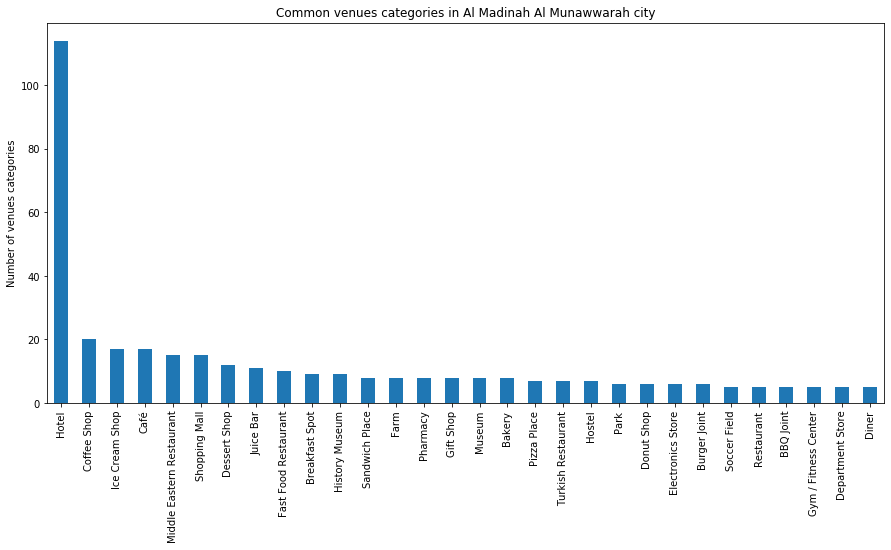

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
city_districts_venues.Category.value_counts()[:30].plot.bar()
plt.title('Common venues categories in ' + city_name + ' city' )
plt.ylabel('Number of venues categories')
plt.show()

#### It can be seen most common categories in the city are:
- Hotels                                 
- Coffee shops                                        
- Ice cream shops                  
- Café                                
- Shopping mall                                      



In [123]:
city_districts_venues.dtypes

Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
city_id                    object
Venue_id                   object
Venue                      object
Latitude                  float64
Longitude                 float64
Category                   object
dtype: object

#### - displaying  number of venues per Neighborhood 

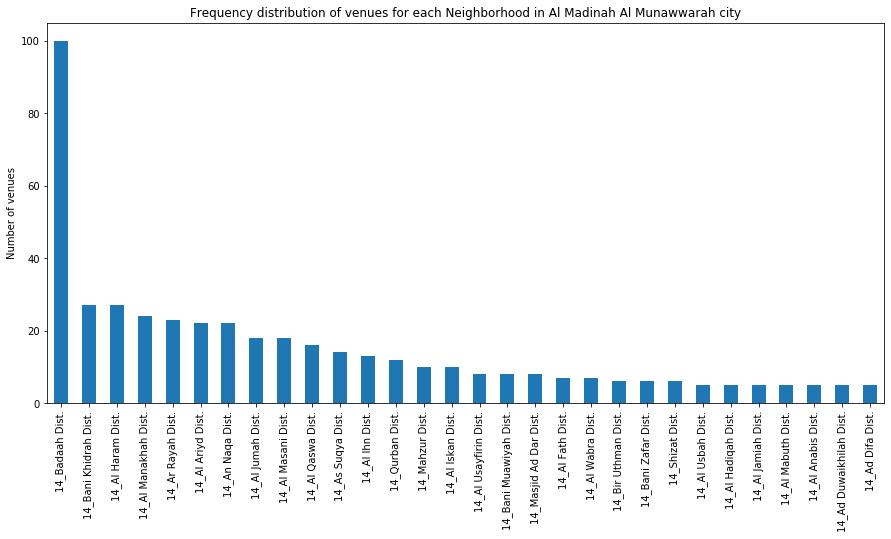

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
city_districts_venues.Neighborhood.value_counts()[:30].plot.bar()
plt.title('Frequency distribution of venues for each Neighborhood in '+city_name + ' city')
plt.ylabel('Number of venues')
plt.show()

The above Figure shows that most of Neighborhood with more than 30 venues are downtone Neighborhoods

## 3-Methodology

*** Steps  1,2 already performed in Data Description & Preperatio phase***

###  Generate one-hot encoding for venues categories  
We use One Hot Encoding for venues categories, and then find out the top ten venues categories present in each neighborhood.

In [125]:
# one hot encoding 
city_onehot = pd.get_dummies(city_districts_venues[['Category']], prefix="", prefix_sep="")
city_onehot.head(100)
# add neighborhood column back to dataframe      
city_onehot['Neighborhood'] =  city_districts_venues['Neighborhood'] 
city_onehot['city_id'] =  city_districts_venues['city_id'] 

# move neighborhood & city_id columns to the first column
fixed_columns=list( city_onehot.columns)
fixed_columns.remove('Neighborhood')
fixed_columns.remove('city_id')

fixed_columns =  ['Neighborhood','city_id'] + fixed_columns

city_onehot = city_onehot[fixed_columns]

print('shape after onehot:',   city_onehot.shape)

city_onehot.head()

shape after onehot: (532, 127)


,Neighborhood,city_id,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,American Restaurant,Art Gallery,Arts & Crafts Store,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Big Box Store,Boarding House,Bookstore,Botanical Garden,Breakfast Spot,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Campground,Castle,Cemetery,Clothing Store,Coffee Shop,Comic Shop,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop,Diner,Dog Run,Doner Restaurant,Donut Shop,Electronics Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Pool,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Lounge,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Mobile Phone Shop,Mosque,Motel,Mountain,Movie Theater,Museum,National Park,Office,Optical Shop,Park,Perfume Shop,Persian Restaurant,Pharmacy,Pie Shop,Pier,Pizza Place,Plaza,Pool,Resort,Rest Area,Restaurant,Salon / Barbershop,Sandwich Place,Shawarma Place,Shoe Store,Shopping Mall,Soccer Field,Sporting Goods Shop,Sports Club,Stadium,Supermarket,Swiss Restaurant,Tea Room,Tech Startup,Tour Provider,Tourist Information Center,Toy / Game Store,Trail,Turkish Restaurant,Video Game Store,Water Park,Yemeni Restaurant
0,14_Bani Bayadah Dist.,834 14\n835 14\n836 14\n837 14\n83...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14_Bani Bayadah Dist.,834 14\n835 14\n836 14\n837 14\n83...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,14_As Sad Dist.,834 14\n835 14\n836 14\n837 14\n83...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14_Al Jabirah Dist.,834 14\n835 14\n836 14\n837 14\n83...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,14_Al Jabirah Dist.,834 14\n835 14\n836 14\n837 14\n83...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### b ) Group by neighborhoods and sum all venues categories 

as shown in above one-hot encodong tabel, there are number of recoreds for each Neighborhood (venues), now we will group data by Neighborhood to have one value between Neighborhood and catagory as shown below:

In [126]:
city_grouped = city_onehot.groupby('Neighborhood').sum().reset_index()

#this second grouping allow keep keeping city_id  

city_grouped = city_onehot.groupby('Neighborhood').mean().values


#print('shape after group:',   combined_city_grouped.shape)
city_grouped

array([[0. , 0. , 0. , ..., 0.2, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [127]:
almadinah_grouped = city_onehot.groupby('Neighborhood').mean().reset_index()
almadinah_grouped.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,American Restaurant,Art Gallery,Arts & Crafts Store,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Big Box Store,Boarding House,Bookstore,Botanical Garden,Breakfast Spot,Buffet,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Campground,Castle,Cemetery,Clothing Store,Coffee Shop,Comic Shop,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop,Diner,Dog Run,Doner Restaurant,Donut Shop,Electronics Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Pool,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Lounge,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Mobile Phone Shop,Mosque,Motel,Mountain,Movie Theater,Museum,National Park,Office,Optical Shop,Park,Perfume Shop,Persian Restaurant,Pharmacy,Pie Shop,Pier,Pizza Place,Plaza,Pool,Resort,Rest Area,Restaurant,Salon / Barbershop,Sandwich Place,Shawarma Place,Shoe Store,Shopping Mall,Soccer Field,Sporting Goods Shop,Sports Club,Stadium,Supermarket,Swiss Restaurant,Tea Room,Tech Startup,Tour Provider,Tourist Information Center,Toy / Game Store,Trail,Turkish Restaurant,Video Game Store,Water Park,Yemeni Restaurant
0,14_Ad Difa Dist.,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.2,0.0,0.0
1,14_Ad Duwaikhilah Dist.,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,14_Ad Duwaimah Dist.,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
3,14_Al Anabis Dist.,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0

#### Let's confirm the new size

In [128]:
almadinah_grouped.shape

(62, 126)

#### Let's print each neighborhood along with the top 5 most common venues

In [ ]:
num_top_venues = 5

for hood in almadinah_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = almadinah_grouped[almadinah_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

#### Let's put that into a *pandas* dataframe

##### First, let's write a function to sort the venues in descending order.

In [130]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

####  - Displaying the top 10 most common venues catagories for each Neighborhood  

In [131]:
#creating the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = almadinah_grouped['Neighborhood']

for ind in np.arange(almadinah_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(almadinah_grouped.iloc[ind, :], num_top_venues)
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(62, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,14_Ad Difa Dist.,Park,Video Game Store,Comic Shop,Farm,Plaza,Dog Run,Falafel Restaurant,Electronics Store,Donut Shop,Doner Restaurant
1,14_Ad Duwaikhilah Dist.,Bus Stop,Soccer Field,Farm,Hookah Bar,Rest Area,Doner Restaurant,Falafel Restaurant,Electronics Store,Donut Shop,Yemeni Restaurant
2,14_Ad Duwaimah Dist.,Turkish Restaurant,Flower Shop,Garden,Yemeni Restaurant,Doner Restaurant,Farmers Market,Farm,Falafel Restaurant,Electronics Store,Donut Shop
3,14_Al Anabis Dist.,Coffee Shop,Electronics Store,Juice Bar,Bakery,Middle Eastern Restaurant,Farmers Market,Farm,Falafel Restaurant,Donut Shop,Flower Shop
4,14_Al Ariyd Dist.,Fast Food Restaurant,Pizza Place,Burger Joint,Juice Bar,Dessert Shop,Donut Shop,American Restaurant,Café,Mediterranean Restaurant,Sandwich Place


### C) Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [132]:
# set number of clusters
kclusters = 5

almadinah_grouped_clustering = almadinah_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(almadinah_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [133]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels']=kmeans.labels_
almadinah_merged = city_districts

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
almadinah_merged = almadinah_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
almadinah_merged.head() # check the last columns!

,district_id,city_id,region_id,name_ar,Neighborhood,Latitude,Longitude,boundaries,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
834,10300014001,14,3,حي خاخ,14_Khakh Dist.,24.362240,39.537870,"[[24.3544108, 39.53713991], [24.3550484, 39.53...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,10300014002,14,3,حي السكب,14_As Sakb Dist.,24.360363,39.582572,"[[24.37330736, 39.55994481], [24.37294336, 39....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,10300014003,14,3,حي الجصة,14_Al Jassah Dist.,24.358140,39.610847,"[[24.35182272, 39.63043329], [24.35089299, 39....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,10300014004,14,3,حي رهط,14_Raht Dist.,24.368233,39.631787,"[[24.36436417, 39.66219498], [24.36322794, 39....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,10300014005,14,3,حي بني بياضة,14_Bani Bayadah Dist.,24.384755,39.592094,"[[24.39186456, 39.59318685], [24.3918323, 39.5...",Gym / Fitness Center,Supermarket,Yemeni Restaurant,Doner Restaurant,Farmers Market,Farm,Falafel Restaurant,Electronics Store,Donut Shop,Dog Run,3.0


In [134]:
almadinah_merged['Cluster Labels'].isnull().sum()
print(almadinah_merged.shape)
# dropping rows with  null values 
almadinah_merged.dropna(axis = 0, inplace = True) 
print(almadinah_merged.shape)
almadinah_merged.head()

(91, 19)
(62, 19)


,district_id,city_id,region_id,name_ar,Neighborhood,Latitude,Longitude,boundaries,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
838,10300014005,14,3,حي بني بياضة,14_Bani Bayadah Dist.,24.384755,39.592094,"[[24.39186456, 39.59318685], [24.3918323, 39.5...",Gym / Fitness Center,Supermarket,Yemeni Restaurant,Doner Restaurant,Farmers Market,Farm,Falafel Restaurant,Electronics Store,Donut Shop,Dog Run,3.0
844,10300014011,14,3,حي السد,14_As Sad Dist.,24.408279,39.633194,"[[24.41268509, 39.62274948], [24.41362301, 39....",Dessert Shop,Yemeni Restaurant,Flower Shop,Cosmetics Shop,Cricket Ground,Department Store,Diner,Dog Run,Doner Restaurant,Donut Shop,3.0
845,10300014012,14,3,حي الجابرة,14_Al Jabirah Dist.,24.404695,39.586949,"[[24.40354893, 39.59112981], [24.40349162, 39....",Halal Restaurant,Home Service,African Restaurant,Middle Eastern Restaurant,Donut Shop,Farmers Market,Farm,Falafel Restaurant,Electronics Store,Dog Run,3.0
846,10300014013,14,3,حي الرانوناء,14_Ar Ranuna Dist.,24.399049,39.597323,"[[24.41683728, 39.60076966], [24.41679279, 39....",Hookah Bar,Café,Yemeni Restaurant,Flower Shop,Cricket Ground,Department Store,Dessert Shop,Diner,Dog Run,Doner Restaurant,0.0
847,10300014014,14,3,حي الحديقة,14_Al Hadiqah Dist.,24.417218,39.609482,"[[24.42064373, 39.62051688], [24.42060326, 39....",Park,Stadium,Art Gallery,National Park,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop,Diner,Fast Food Restaurant,3.0


Finally, let's visualize the resulting clusters

In [135]:
x = np.arange(kclusters)
print(x)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow

[0 1 2 3 4]


['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']

In [136]:
# create map
latitude = 24.47058
longitude = 39.60781
map_clusters = folium.Map(location=[latitude , longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map  
markers_colors = []
for lat, lon, poi, cluster in zip(almadinah_merged['Latitude'], almadinah_merged['Longitude'], almadinah_merged['Neighborhood'], almadinah_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    #print(cluster)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## D) Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

In [137]:
almadinah_merged.set_index("Neighborhood", inplace= True)

#### Cluster 1

In [138]:
almadinah_merged.loc[almadinah_merged['Cluster Labels'] == 0 , almadinah_merged.columns[[1] + list(range(5, almadinah_merged.shape[1]))]]

,city_id,Longitude,boundaries,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
Neighborhood,,,,,,,,,,,,,,
14_Ar Ranuna Dist.,14,39.597323,"[[24.41683728, 39.60076966], [24.41679279, 39....",Hookah Bar,Café,Yemeni Restaurant,Flower Shop,Cricket Ground,Department Store,Dessert Shop,Diner,Dog Run,Doner Restaurant,0.0
14_Bani Harithah Dist.,14,39.627848,"[[24.48564547, 39.61575111], [24.48662775, 39....",Persian Restaurant,Café,Diner,Indian Restaurant,Yemeni Restaurant,Fast Food Restaurant,Cricket Ground,Department Store,Dessert Shop,Dog Run,0.0
14_Shuran Dist.,14,39.622276,"[[24.4122708, 39.62312234], [24.412227, 39.623...",Café,Yemeni Restaurant,Flower Shop,Cricket Ground,Department Store,Dessert Shop,Diner,Dog Run,Doner Restaurant,Donut Shop,0.0


#### Cluster 2

In [139]:
almadinah_merged.loc[almadinah_merged['Cluster Labels'] == 1, almadinah_merged.columns[[1] + list(range(5, almadinah_merged.shape[1]))]]

,city_id,Longitude,boundaries,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
Neighborhood,,,,,,,,,,,,,,
14_An Naqa Dist.,14,39.604915,"[[24.46682528, 39.604814], [24.46570653, 39.60...",Hotel,History Museum,Ice Cream Shop,Middle Eastern Restaurant,Men's Store,Plaza,Resort,Farmers Market,Cosmetics Shop,Big Box Store,1.0
14_Al Manakhah Dist.,14,39.604343,"[[24.46738333, 39.60481675], [24.46739629, 39....",Hotel,Museum,Gift Shop,Shopping Mall,Ice Cream Shop,Plaza,Swiss Restaurant,Diner,Dog Run,Electronics Store,1.0
14_Badaah Dist.,14,39.610184,"[[24.47095138, 39.60610706], [24.47155078, 39....",Hotel,Shopping Mall,Coffee Shop,Donut Shop,Ice Cream Shop,Mobile Phone Shop,Fast Food Restaurant,Hostel,Café,Gift Shop,1.0
14_Al Masani Dist.,14,39.608860,"[[24.48560351, 39.61340205], [24.48564547, 39....",Hotel,Turkish Restaurant,Breakfast Spot,Middle Eastern Restaurant,Clothing Store,Diner,Juice Bar,Hostel,Café,Indian Chinese Restaurant,1.0
14_As Suqya Dist.,14,39.600247,"[[24.46112392, 39.60106684], [24.46060103, 39....",Hotel,History Museum,Breakfast Spot,Restaurant,Bakery,Resort,Middle Eastern Restaurant,Dog Run,Doner Restaurant,Farmers Market,1.0
14_Bani Khidrah Dist.,14,39.612655,"[[24.46411419, 39.60707874], [24.46413448, 39....",Hotel,History Museum,Museum,Hostel,Fried Chicken Joint,Cemetery,Department Store,Mosque,Middle Eastern Restaurant,Farmers Market,1.0
14_Al Haram Dist.,14,39.612750,"[[24.46411419, 39.60707874], [24.46410303, 39....",Hotel,History Museum,Hostel,Museum,Shopping Mall,Fried Chicken Joint,Department Store,Mosque,Office,Cemetery,1.0


#### Cluster 3

In [140]:
almadinah_merged.loc[almadinah_merged['Cluster Labels'] == 2, almadinah_merged.columns[[1] + list(range(5, almadinah_merged.shape[1]))]]

,city_id,Longitude,boundaries,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
Neighborhood,,,,,,,,,,,,,,
14_Az Zahrah Dist.,14,39.565242,"[[24.54368047, 39.58184065], [24.54356982, 39....",Bus Stop,Yemeni Restaurant,Flower Shop,Cricket Ground,Department Store,Dessert Shop,Diner,Dog Run,Doner Restaurant,Donut Shop,2.0


#### Cluster 4

In [141]:
almadinah_merged.loc[almadinah_merged['Cluster Labels'] == 3, almadinah_merged.columns[[1] + list(range(5, almadinah_merged.shape[1]))]]

,city_id,Longitude,boundaries,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
Neighborhood,,,,,,,,,,,,,,
14_Bani Bayadah Dist.,14,39.592094,"[[24.39186456, 39.59318685], [24.3918323, 39.5...",Gym / Fitness Center,Supermarket,Yemeni Restaurant,Doner Restaurant,Farmers Market,Farm,Falafel Restaurant,Electronics Store,Donut Shop,Dog Run,3.0
14_As Sad Dist.,14,39.633194,"[[24.41268509, 39.62274948], [24.41362301, 39....",Dessert Shop,Yemeni Restaurant,Flower Shop,Cosmetics Shop,Cricket Ground,Department Store,Diner,Dog Run,Doner Restaurant,Donut Shop,3.0
14_Al Jabirah Dist.,14,39.586949,"[[24.40354893, 39.59112981], [24.40349162, 39....",Halal Restaurant,Home Service,African Restaurant,Middle Eastern Restaurant,Donut Shop,Farmers Market,Farm,Falafel Restaurant,Electronics Store,Dog Run,3.0
14_Al Hadiqah Dist.,14,39.609482,"[[24.42064373, 39.62051688], [24.42060326, 39....",Park,Stadium,Art Gallery,National Park,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop,Diner,Fast Food Restaurant,3.0
14_Al Qaswa Dist.,14,39.589593,"[[24.42825848, 39.60601986], [24.42818653, 39....",Bakery,Yemeni Restaurant,Restaurant,Burger Joint,Café,Coffee Shop,Doner Restaurant,Donut Shop,Falafel Restaurant,Fast Food Restaurant,3.0
14_Al Usbah Dist.,14,39.615441,"[[24.4263577, 39.61942727], [24.42633661, 39.6...",Big Box Store,Pharmacy,Hotel Pool,Arts & Crafts Store,Water Park,Dessert Shop,Department Store,Diner,Dog Run,Food & Drink Shop,3.0
14_Al Khatim Dist.,14,39.622014,"[[24.4263577, 39.61942727], [24.42731026, 39.6...",Motel,Arts & Crafts Store,Farm,Hotel Pool,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Doner Restaurant,Yemeni Restaurant,3.0
14_Al Aziziyah Dist.,14,39.500703,"[[24.43370571, 39.4987144], [24.43364971, 39.4...",Burger Joint,Kebab Restaurant,Yemeni Restaurant,Flower Shop,Cricket Ground,Department Store,Dessert Shop,Diner,Dog Run,Doner Restaurant,3.0
14_Al Ihn Dist.,14,39.632616,"[[24.43889318, 39.63641157], [24.4388112, 39.6...",Coffee Shop,Garden,Café,Business Service,Farm,Farmers Market,Botanical Garden,Bakery,Optical Shop,Garden Center,3.0


#### Cluster 5

In [142]:
almadinah_merged.loc[almadinah_merged['Cluster Labels'] == 4, almadinah_merged.columns[[1] + list(range(5, almadinah_merged.shape[1]))]]

,city_id,Longitude,boundaries,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
Neighborhood,,,,,,,,,,,,,,
14_Ar Rawabi Dist.,14,39.662602,"[[24.41867641, 39.67161693], [24.41753367, 39....",Farm,Park,Yemeni Restaurant,Flower Shop,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop,Diner,Dog Run,4.0
14_As Sadiqiyah Dist.,14,39.579453,"[[24.55818679, 39.59347244], [24.55806418, 39....",Farm,Yemeni Restaurant,Flower Shop,Cosmetics Shop,Cricket Ground,Department Store,Dessert Shop,Diner,Dog Run,Doner Restaurant,4.0


## Name each cluster based on most common venues in this cluster

In [159]:
#this function will count Most Common Venues 1--> 10 
def cluster_name(data):
    ven = []
    for i in range(7,17): # from 1st Most Common Venue to 10th  Most Common Venue  
        ven= ven+ list(data[data.columns[i]]) # add all Venues in one list  
    ven = pd.DataFrame({'Venue':ven})
    return ven.Venue.value_counts().head() # return most 5 Venues

In [160]:
#dislay 
for i in range(0,5):
    # return most common Venue 
    print('Cluster_No:',i)
    print(cluster_name(almadinah_merged.loc[almadinah_merged['Cluster Labels'] == i ] ) )
    print()

Cluster_No: 0
Diner                3
Department Store     3
Dog Run              3
Yemeni Restaurant    3
Dessert Shop         3
Name: Venue, dtype: int64

Cluster_No: 1
Hotel                        7
History Museum               4
Hostel                       4
Middle Eastern Restaurant    4
Farmers Market               3
Name: Venue, dtype: int64

Cluster_No: 2
Diner               1
Cricket Ground      1
Department Store    1
Donut Shop          1
Flower Shop         1
Name: Venue, dtype: int64

Cluster_No: 3
Dessert Shop          29
Yemeni Restaurant     27
Diner                 24
Doner Restaurant      23
Falafel Restaurant    23
Name: Venue, dtype: int64

Cluster_No: 4
Dessert Shop        2
Cosmetics Shop      2
Department Store    2
Flower Shop         2
Diner               2
Name: Venue, dtype: int64



# 4- Conclusion

We can name cluster from most two/three Venues as followig:
- Cluster_0: Cricket Ground  area, 
- Cluster_1: Hotel 
- Cluster_2: Diner
- Cluster_3: Yemeni Restaurant  
- Cluster_4: Cosmetics Shop, Flower Shop   